# Linear Regression

# Introduction


The objective of this kernel is to create a **linear regression model** for a given dataset( House Sales in King County, USA). The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.

**Linear Regression Analysis** consists of more than just fitting a linear line through a cloud of data points.  It consists of 3 stages – (1) analyzing the correlation and directionality of the data, (2) estimating the model, i.e., fitting the line, and (3) evaluating the validity and usefulness of the model.

(1) First import the file, perform data preprocessing(removing null values, changing data type, etc) and then perform EDA(Exploratory Data Analysis) for the data. Find if there are any correlations between the data.

(2) Now we create a base model ABC, create required abstract classes. Create linearmodel class which is sub class of ABC class. Define the required methods. Now we create two classes **least squares** and **least mean squares** which are linear regression classes. We intialize the models, create train method to train the data. We intialize the train step so that the line can take the no of steps required.

(3) In order to know that the created model is vaild, we create plots to see the predicted line and the points where the required value should be vaild. We know that the model is valid and is useful when it passes the preliminary test, where the least mean square and least squares are verified with various data.


# Data

## Description

In this dataset we have to predict the **sales price of houses in King County, Seattle**. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

The dataset cantains 20 house features plus the price, along with 21613 observations.

The description for the 20 features is given below:

1. id :- It is the unique numeric number assigned to each house being sold.
2. date :- It is the date on which the house was sold out.
3. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
4. bedrooms :- It determines number of bedrooms in a house.
5. bathrooms :- It determines number of bathrooms in a bedroom of a house.
6. sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
7. sqft_lot : It is also the measurement variable which determines square foot of the lot.
8. floors: It determines total floors means levels of house.
9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
11. condition : It determines the overall condition of a house on a scale of 1 to 5.
12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
13. sqft_above : It determines square footage of house apart from basement.
14. sqft_basement : It determines square footage of the basement of the house.
15. yr_built : It detrmines the date of building of the house.
16. yr_renovated : It detrmines year of renovation of house.
17. zipcode : It determines the zipcode of the location of the house.
18. lat : It determines the latitude of the location of the house.
19. long : It determines the longitude of the location of the house.
20. sqft_living15 : Living room area in 2015(implies-- some renovations)
21. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

By observing the data, we can know that the **price is dependent on various features** like bedrooms(which is most dependent feature), bathrooms, sqft_living(second most important feature), sqft_lot, floors etc. The price is also dependent on the location of the house where it is present. The other features like waterfront, view are less dependent on the price. Of all the records, there are **no missing values, which helps us creating better model.** 

First, we **import** the required libraries like pandas, numpy, seaborn, matplotlib. Now import the **csv file.** Now we should get to know how the data is, what datatype using info function. We observe that date is in 'object' format. To know the no of rows and columns we use shape function. Describe the dataframe to know the mean, minumum, ,maximum, standard deviation, percentiles. 

Now, find if there are any null values. Luckily, there are no null values which helps us in getting the accurate model. We drop the unnecessary columns ike 'lat', 'long', 'view'. **There is an outlier in the given data.** Although it is not exactly a outlier, i would like to remove the value so that we can obtain better graph. The **no of bedrooms is '33'** for one observation. I removed that value. 

The **date is in object format, so it is converted into date format** using pandas. Now, the graphs are plotted for better understanding or better analysis. The graphs like relplot, boxplot, heatplot, lineplot, catplot are used for analysis.


In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
#read the csv file into dataframe
df=pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

# Preprocessing of Data

In [3]:
#getting to know about the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
#view dataframe
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
#finding the shape of dataframe
df.shape

(21613, 21)

In [6]:
#find the mean, count, min, max, percentile, standard deviation of given data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#checking for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#delete unnecessary column
del df['lat']

In [9]:
#view first 5 records
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,-122.045,1800,7503


In [10]:
#delete unnecessary column
del df['long']

In [11]:
#view first five records
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [12]:
#delete unnecessary column
del df['view']

In [13]:
#view first 5 records
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,1800,7503


In [14]:
#finding value counts of no of bedrooms 
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [15]:
#removing outlier with '33' bedrooms
df=df[df['bedrooms']!=33]

In [16]:
#check if the outlier is removed
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [17]:
#conevrting data column into float type
pd.options.display.float_format = '{:,.0f}'.format
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900",3,1,1180,5650,1,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,"538,000",3,2,2570,7242,2,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,"180,000",2,1,770,10000,1,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,"604,000",4,3,1960,5000,1,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,"510,000",3,2,1680,8080,1,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,"360,000",3,2,1530,1131,3,0,3,8,1530,0,2009,0,98103,1530,1509
21609,6600060120,20150223T000000,"400,000",4,2,2310,5813,2,0,3,8,2310,0,2014,0,98146,1830,7200
21610,1523300141,20140623T000000,"402,101",2,1,1020,1350,2,0,3,7,1020,0,2009,0,98144,1020,2007
21611,291310100,20150116T000000,"400,000",3,2,1600,2388,2,0,3,8,1600,0,2004,0,98027,1410,1287


In [18]:
#formatting the unncessary values in data column
df['date']=[x[:8] for x in df['date']]
df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013,"221,900",3,1,1180,5650,1,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209,"538,000",3,2,2570,7242,2,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225,"180,000",2,1,770,10000,1,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209,"604,000",4,3,1960,5000,1,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218,"510,000",3,2,1680,8080,1,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,"360,000",3,2,1530,1131,3,0,3,8,1530,0,2009,0,98103,1530,1509
21609,6600060120,20150223,"400,000",4,2,2310,5813,2,0,3,8,2310,0,2014,0,98146,1830,7200
21610,1523300141,20140623,"402,101",2,1,1020,1350,2,0,3,7,1020,0,2009,0,98144,1020,2007
21611,291310100,20150116,"400,000",3,2,1600,2388,2,0,3,8,1600,0,2004,0,98027,1410,1287


In [19]:
#changing date column into date type using pandas
df['date']=pd.to_datetime(df["date"])
df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,"221,900",3,1,1180,5650,1,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,2014-12-09,"538,000",3,2,2570,7242,2,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,2015-02-25,"180,000",2,1,770,10000,1,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,2014-12-09,"604,000",4,3,1960,5000,1,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,2015-02-18,"510,000",3,2,1680,8080,1,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,"360,000",3,2,1530,1131,3,0,3,8,1530,0,2009,0,98103,1530,1509
21609,6600060120,2015-02-23,"400,000",4,2,2310,5813,2,0,3,8,2310,0,2014,0,98146,1830,7200
21610,1523300141,2014-06-23,"402,101",2,1,1020,1350,2,0,3,7,1020,0,2009,0,98144,1020,2007
21611,291310100,2015-01-16,"400,000",3,2,1600,2388,2,0,3,8,1600,0,2004,0,98027,1410,1287


In [20]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 18 columns):
id               21612 non-null int64
date             21612 non-null datetime64[ns]
price            21612 non-null float64
bedrooms         21612 non-null int64
bathrooms        21612 non-null float64
sqft_living      21612 non-null int64
sqft_lot         21612 non-null int64
floors           21612 non-null float64
waterfront       21612 non-null int64
condition        21612 non-null int64
grade            21612 non-null int64
sqft_above       21612 non-null int64
sqft_basement    21612 non-null int64
yr_built         21612 non-null int64
yr_renovated     21612 non-null int64
zipcode          21612 non-null int64
sqft_living15    21612 non-null int64
sqft_lot15       21612 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(14)
memory usage: 3.1 MB


# Plots for understanding or Analysis

A plot is a graphical technique for representing a data set, usually as a graph showing the relationship between two or more variables. Graphs are a visual representation of the relationship between variables, which are very useful for humans who can then quickly derive an understanding which may not have come from lists of values.

We have plotted the graphs like **replot, boxplot, heatmap, lineplot, catplot, 3d graph**. We plotted graphs between price, bedrooms, bathrooms, sqft_living, sqft_lot, date of purchase, condition for analyzing the data. Relplot is ised to find the relation between bedrooms and price. We plotted boxplot for further understanding. A graph is plotted between bathrooms and price. Heatmap is plotted between all the columns for finding correlation. 

> A plot is plotted for finding dates vs price. Graphs are plotted for finding the relationship between sqft_living vs price, sqft_lot vs price, condition vs price.

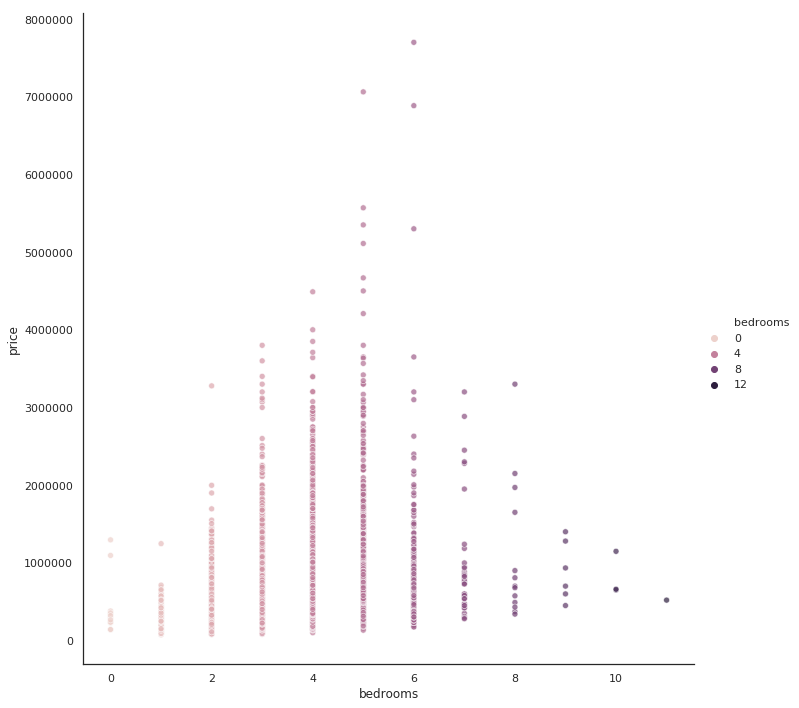

In [21]:
#replot for bedrooms and price
sns.set(style='white')
sns.relplot(x='bedrooms',y='price',hue='bedrooms',alpha=0.7,height=10,data=df)

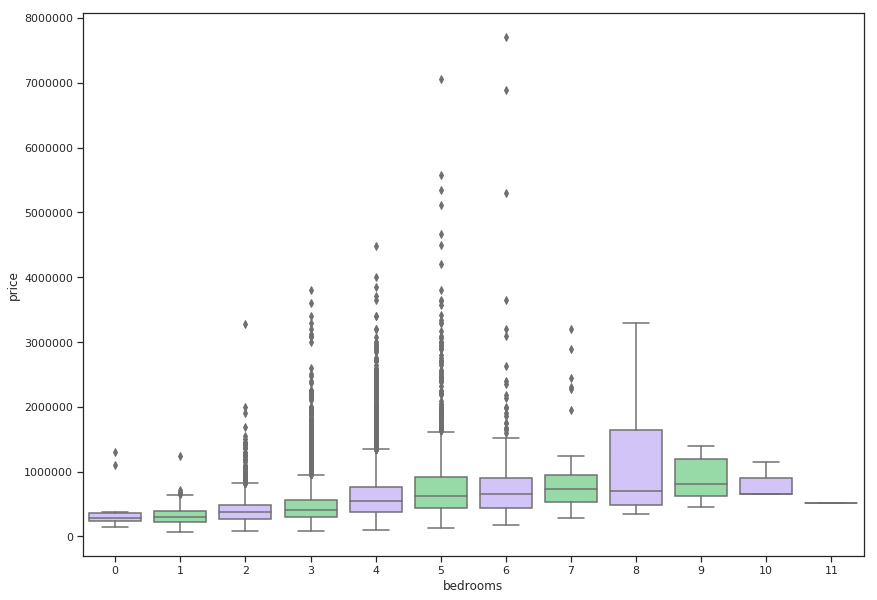

In [22]:
#plot boxplot graph for bedrooms and price
sns.set(style='ticks',palette='pastel')
fig, ax = plt.subplots(figsize=(14,10)) 
sns.boxplot(x='bedrooms',y='price',palette=["m", "g"], data=df,ax=ax)

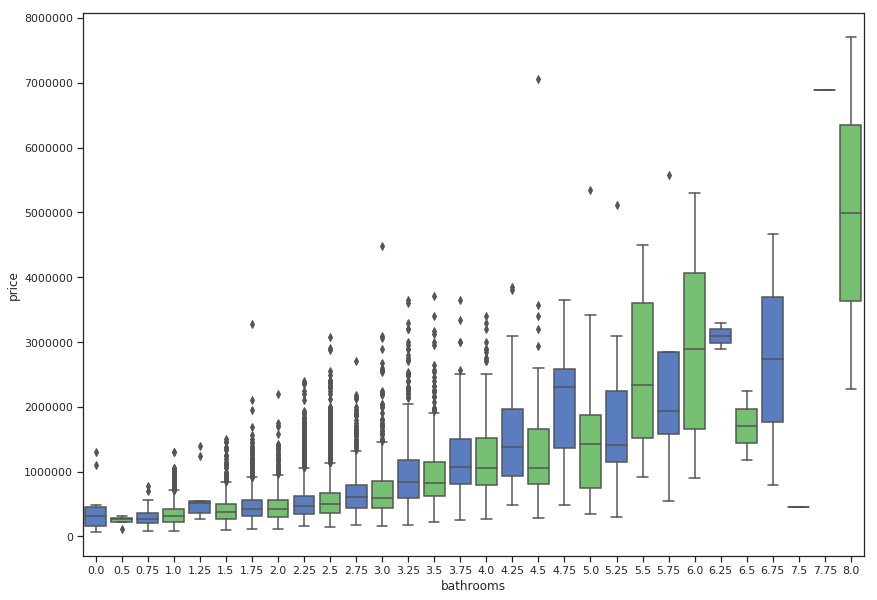

In [23]:
#boxplot between bathrooms and price
sns.set(style='ticks',palette='muted')
fig,ax=plt.subplots(figsize=(14,10))
sns.boxplot(x='bathrooms',y='price',palette=["b", "g"],data=df,ax=ax)

In [24]:
#find correlation
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,1,-0,0,0,-0,-0,0,-0,-0,0,-0,-0,0,-0,-0,-0,-0
price,-0,1,0,1,1,0,0,0,0,1,1,0,0,0,-0,1,0
bedrooms,0,0,1,1,1,0,0,-0,0,0,0,0,0,0,-0,0,0
bathrooms,0,1,1,1,1,0,1,0,-0,1,1,0,1,0,-0,1,0
sqft_living,-0,1,1,1,1,0,0,0,-0,1,1,0,0,0,-0,1,0
sqft_lot,-0,0,0,0,0,1,-0,0,-0,0,0,0,0,0,-0,0,1
floors,0,0,0,1,0,-0,1,0,-0,0,1,-0,0,0,-0,0,-0
waterfront,-0,0,-0,0,0,0,0,1,0,0,0,0,-0,0,0,0,0
condition,-0,0,0,-0,-0,-0,-0,0,1,-0,-0,0,-0,-0,0,-0,-0
grade,0,1,0,1,1,0,0,0,-0,1,1,0,0,0,-0,1,0


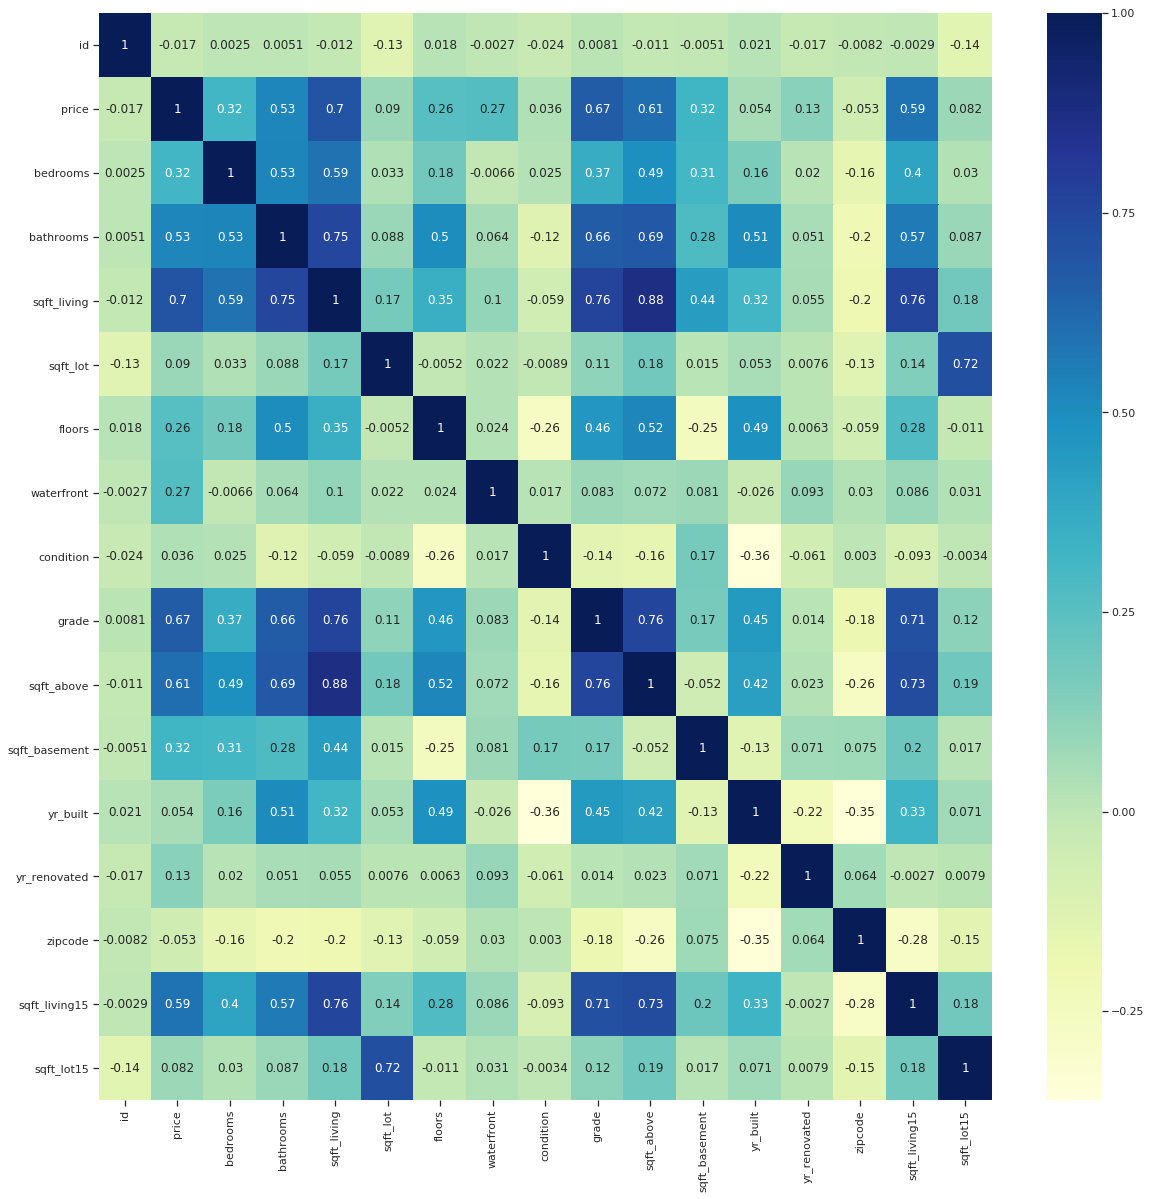

In [25]:
#heatmap for all the required features for correlation
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
     'sqft_living15', 'sqft_lot15']]
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot=True,ax=ax)

bedrooms
0     AxesSubplot(0.125,0.2;0.775x0.68)
1     AxesSubplot(0.125,0.2;0.775x0.68)
2     AxesSubplot(0.125,0.2;0.775x0.68)
3     AxesSubplot(0.125,0.2;0.775x0.68)
4     AxesSubplot(0.125,0.2;0.775x0.68)
5     AxesSubplot(0.125,0.2;0.775x0.68)
6     AxesSubplot(0.125,0.2;0.775x0.68)
7     AxesSubplot(0.125,0.2;0.775x0.68)
8     AxesSubplot(0.125,0.2;0.775x0.68)
9     AxesSubplot(0.125,0.2;0.775x0.68)
10    AxesSubplot(0.125,0.2;0.775x0.68)
11    AxesSubplot(0.125,0.2;0.775x0.68)
Name: price, dtype: object

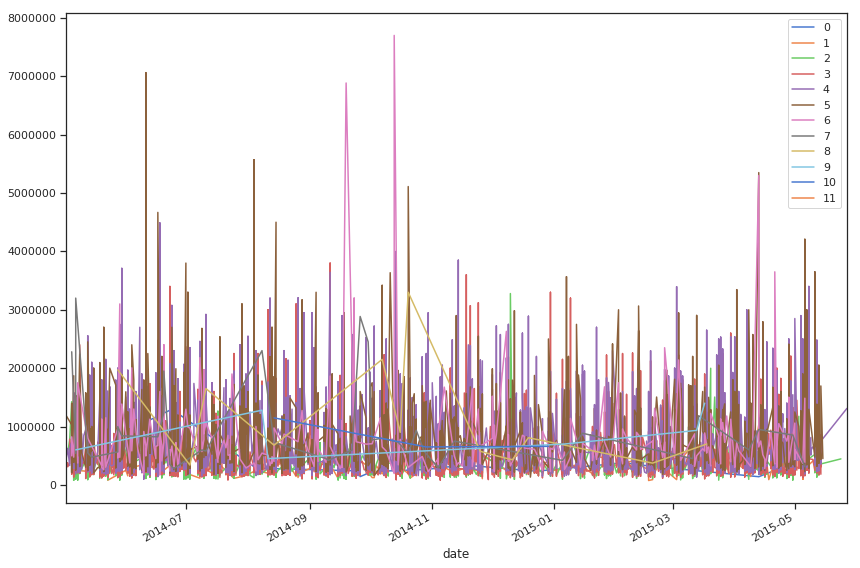

In [26]:
#graph for dates,price and bedrooms
fig,ax=plt.subplots(figsize=(14,10))
df.set_index('date').groupby('bedrooms')['price'].plot(legend=True)

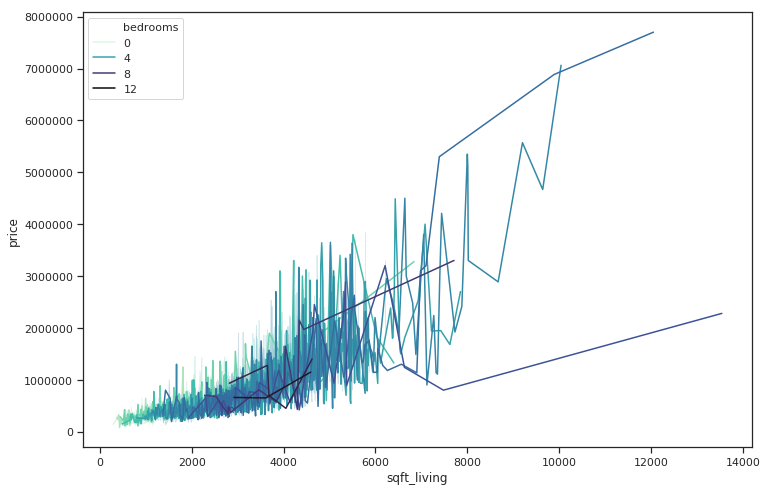

In [27]:
#lineplot for sqft living and price
fig,ax=plt.subplots(figsize=(12,8))
palette=sns.color_palette('mako_r',6)
ax=sns.lineplot(x='sqft_living',y='price',data=df,hue='bedrooms',palette='mako_r')

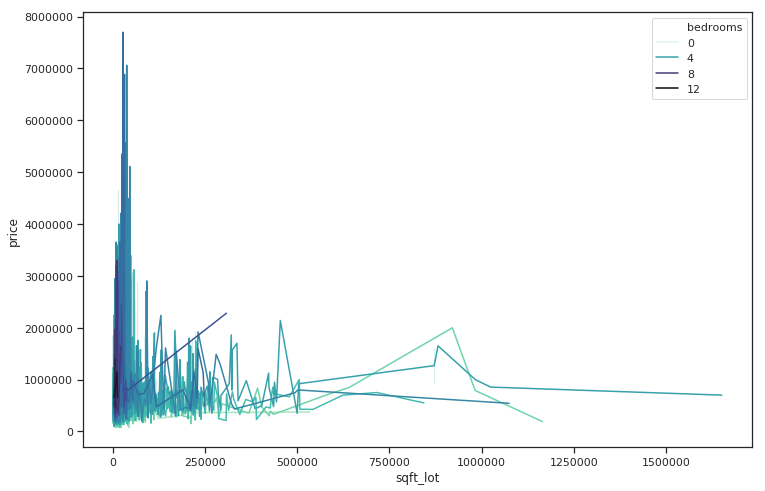

In [28]:
#lineplot for sqft lot and price
fig,ax=plt.subplots(figsize=(12,8))
palette=sns.color_palette('mako_r',6)
ax=sns.lineplot(x='sqft_lot',y='price',data=df,hue='bedrooms',palette='mako_r')

In [29]:
#value counts of condition of the house
df['condition'].value_counts()

3    14031
4     5679
5     1700
2      172
1       30
Name: condition, dtype: int64

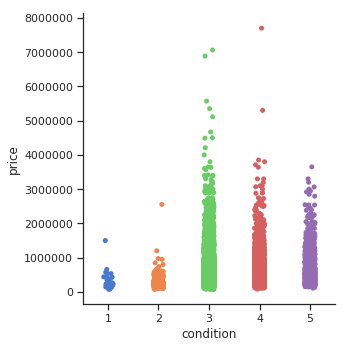

In [30]:
#catplot for condition and price
sns.catplot(x='condition',y='price',data=df)

[(0, 250000)]

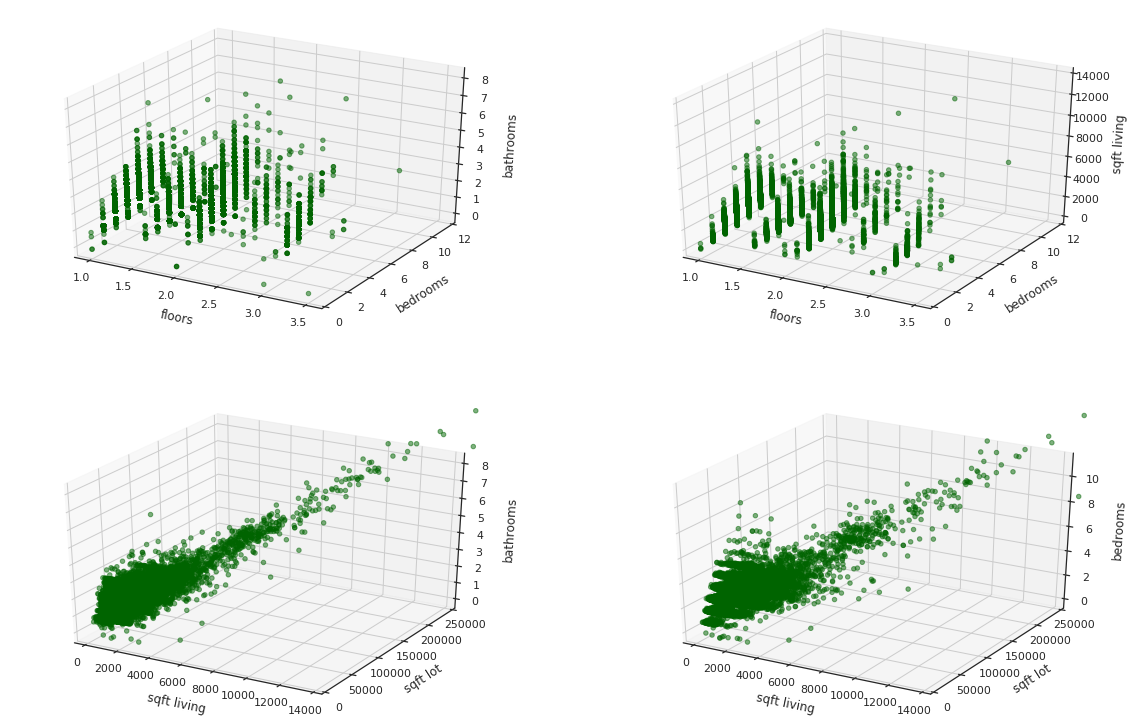

In [31]:
#3d plot
fig=plt.figure(figsize=(20,13))
ax=fig.add_subplot(2,2,1,projection='3d')
ax.scatter(df['floors'],df['bedrooms'],df['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nbathrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2,projection='3d')
ax.scatter(df['floors'],df['bedrooms'],df['sqft_living'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nsqft living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3,projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bathrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nbathrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4,projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'],c='darkgreen',alpha=0.5)
ax.set(xlabel='\nsqft living',ylabel='\nsqft lot',zlabel='\nbedrooms')
ax.set(ylim=[0,250000])

# Preliminary Observation

After observing the data and graphs carefully, we can observe that the price is mostly dependent on the location, no of bedrooms, bathrooms, sqft living, sqft lot, floors, condition. We can note a few points:

(1) The frequency of no of bedrooms=3,4 is higher than any other bedrooms. The price of these are mostly similar, but some have giher price than usual because of the other features like bathrooms, location, etc.

(2) The heatmap identifies the correlations between the features which help us in identifying how the features are dependent on each other which cannot be known by seeing the data. (Example: sqft living is dependent on grade of the house)

(3) The highest priced houses are sold in months: 9th to 11th. This shows people tend to spend more money on houses which are having more comforts in winter.

(4) Most of the houses have sqft living in between 500 to 6000 irrespective of no of bedrooms. The higer the living space, the higher is the cost.

(5) Price of the house is also dependent on sqft of lot (parking) as most people own their own car.

(6) People are tending to pay less if the condition of the house is bad. They are spending more if the house is in good condition.

(7) The 3d plot gives relationship between multiple features.


# Method


## Review

**Least Squares**

As the name implies, the method of Least Squares minimizes the sum of the squares of the residuals between the observed targets in the dataset, and the targets predicted by the linear approximation. We calculate the distance from the line to a given data point by subtracting one from the other. We take the square of the difference because we don’t want the predicted values below the actual values to cancel out with those above the actual values.

**Least mean squares**

As the name implies, the method of Least Mean Squares minimizes the mean of the squares of the residuals between the observed targets in the dataset, and the targets predicted by the linear approximation. We calculate the distance from the line to a given data point by subtracting one from the other. We take the square of the difference and find mean of it because we don’t want the predicted values below the actual values to cancel out with those above the actual values.

## Explination of Codes

### Least Squares

First we initialize the model with __init__. We defined two classes train(self,X,T) and use(self,X). This is subclass of Basemodel ABC.

**Train(self,X,T):**

The function trains the weight w for the whole training dataset. We add new data to the vector xtx. It accepts both dependent and independent variables and uses both in the formula of calculating the best weight for the model. The weight is calculated using self.w. 

**Use(self,X):**

use(self,X) function accepts the test values of X. Based on the values of X the function estimates the value of Y and returns it to the calling statement. It creates hypothesis for the data and returns hypothesis.

### Least Mean Squares

First we initialize the model with __init__. We define three classes train(self,X,T), train_step(self,x,t) and use(self,X).

**Train(self,X,Y)**

The function trains the weight w for the whole training dataset. For every x,t we initialize train_step(self,x,t) function. The function accepts the dependent and the independent values as parameters and based on the recieved data it sends the data one by one to the train_step(self, x, t) function to update the step function w sequentialy. Thus it recursively calls the train_step(self, x, t) function until all the values of X and T is exhausted.

**train_step(self,x,t)**

This function will first check if the x has 2 dimensional matrix or not. If it is not 2 dimensional, it will insert the values. Now it will check if the self.w is empty or not. If it is empty then it will add zeroes to self.w array. If it is not empty, then it will check for the alpha value for the line.

**use(self,X)**

use(self,X) function accepts the test values of X as parameters. It initializes the hstack. Based on the values of X the function estimates the value of the dependent variable and returns it to the calling statement. 

### Super Classs Definition

In [32]:
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass

### Least Squares

In [33]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        xtrans = X.T.dot(X)
        self.w = np.linalg.pinv(xtrans).dot(X.T).dot(T)
        self.w = self.w.T
        print(self.w)
        return self.w.T
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        a=self.w.dot(X.T)
        return a.T
       

### Least Mean Squares

In [34]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x,t in zip(X,T):
            self.train_step(x,t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = x.reshape(1,x.size)
        xr = self.add_ones(x)
        t = t.reshape(t.size,1)
        if self.w is None:
            self.w = np.zeros((xr.shape[1],1))
        self.w = self.w - self.alpha*(xr@self.w - t)*xr.T     ## TODO: replace this with your codes
        #else
            #self.w= self.train_step(x,t)
    
    # apply the current model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        return X1 @ self.w  
        

# Usage Examples

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

[[ 3.2 -2. ]]


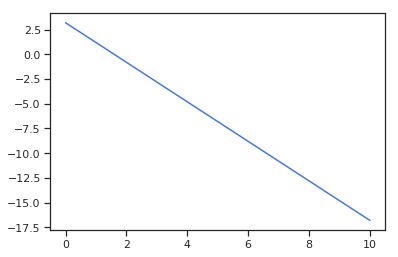

In [36]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()
ls.train(X, T)
plt.plot(ls.use(X))

[[ 3.2 -2. ]]


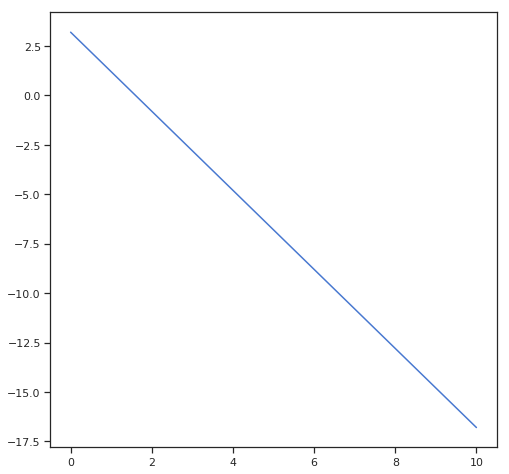

In [37]:
fig,ax=plt.subplots(figsize=(8,8))
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2
ls = LinearRegress()
ls.train(X, T)
plt.plot(ls.use(X))

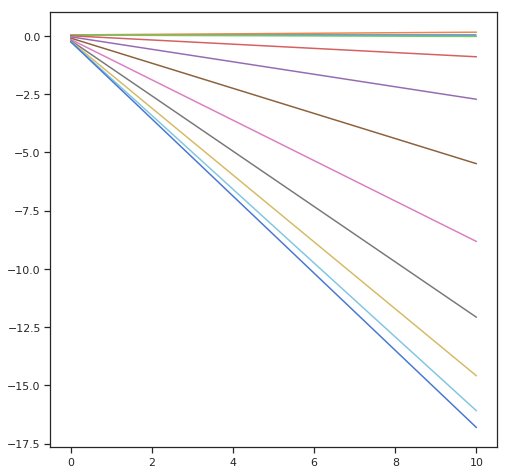

In [38]:
fig,ax=plt.subplots(figsize=(8,8))
lms = LMS(0.01)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

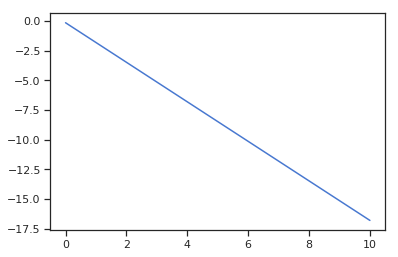

In [39]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

### Description, Codes, Visualization

First we create X,y by definind their features. Now consider y as an array. Transpose the array. We plot different graphs for the training set, test for viewing the linear regression.

In [40]:
#We create X and y and find their values. Now y is an array and it is transposed.
X=df[['bedrooms','bathrooms','sqft_living','sqft_lot','condition','grade','floors']].values
y=df['price'].values
y=np.array([y])
y=y.transpose()

[[-7.31049236e+05 -4.75729216e+04 -1.40141340e+04  2.15823103e+02
  -3.61657892e-01  6.32273577e+04  1.07846617e+05 -1.55863702e+04]]


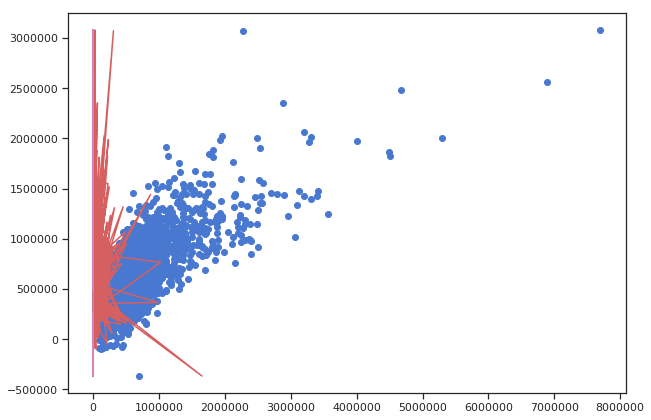

In [41]:
#We are plotting graph for train and prediction of the data for least squares
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)
ls=LinearRegress()
ls.train(X_train,y_train)
y_pred=ls.use(X_test)
fig,ax=plt.subplots(figsize=(10,7))
plt.scatter(y_test,y_pred)
plt.plot(X_test,ls.use(X_test))  

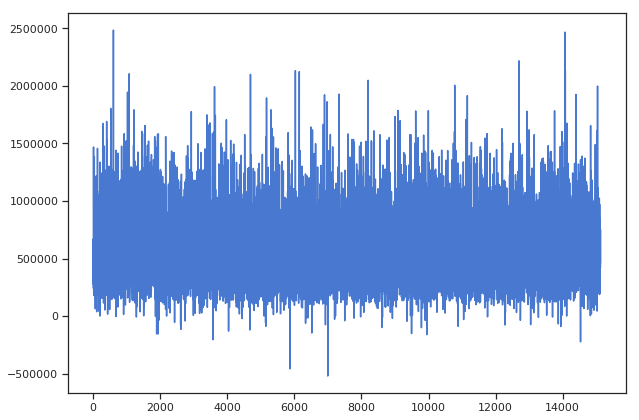

In [42]:
#plot the graph for X training set 
fig,ax=plt.subplots(figsize=(10,7))
plt.plot(ls.use(X_train))

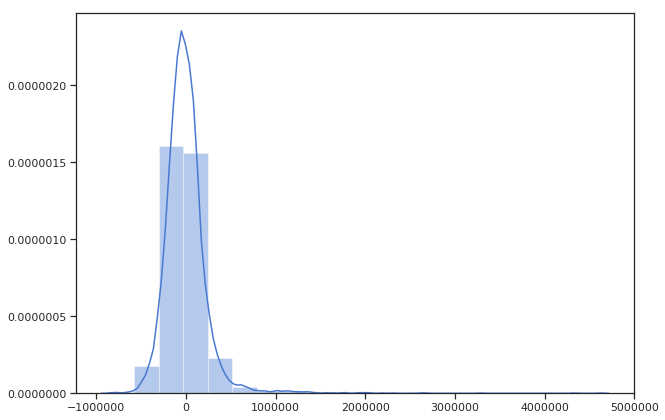

In [43]:
#we plot graph for difference between y test and y prediction
fig,ax=plt.subplots(figsize=(10,7))
sns.distplot((y_test-y_pred),bins=20);

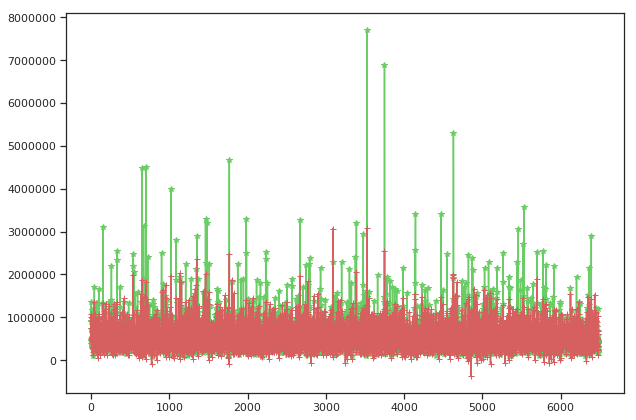

In [44]:
#plot graph for y test and y prediction to see the variation of the data
fig,ax=plt.subplots(figsize=(10,7))
plt.plot(y_test, 'g-*')
plt.plot(y_pred, 'r-+')

# Analysis / Comparision of Algorithms

**Least Squares**

As the name implies, the method of Least Squares minimizes the sum of the squares of the residuals between the observed targets in the dataset, and the targets predicted by the linear approximation. We calculate the distance from the line to a given data point by subtracting one from the other. We take the square of the difference because we don’t want the predicted values below the actual values to cancel out with those above the actual values.

The least squares regression analysis is easy to implement, It is faster, easy to compute and less overhead to the system. It has less senstivity to outliers. But the problem is, it is not normally distributed. It takes a lot of time to compute for larger datasets.


**Least mean squares**

As the name implies, the method of Least Mean Squares minimizes the mean of the squares of the residuals between the observed targets in the dataset, and the targets predicted by the linear approximation. We calculate the distance from the line to a given data point by subtracting one from the other. We take the square of the difference and find mean of it because we don’t want the predicted values below the actual values to cancel out with those above the actual values.

The least mean squares regression analysis is faster, the data is normally distributed, it is good for large datsets. It is not much effected by the outliers. Not suggested for smaller datsets as it produces unexpected datasets.


# Preliminary Test

In [45]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
[[ 3.  3. -2.]]
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Conclusion

The objective of this kernel is to create a **linear regression model**. We performed data preprocessing and Exploratory data analysis on the dataset 'House Sales in King County, USA' to obtain the correlations between the features and find which features are useful for predicting linear regression model. We are performing least squares and least mean sqaures for the given dataset. The least squares is perfect for smaller datasets, it is not normalized where as least mean squares is perfect for large datasets, we normalize the data for reducing the skewness of the data. We plot graphs for the line and see if it fits correctly for the data or not. The preliminary tests shows that we obtained both least squares and least mean squares correctly.

# References

1) https://www.kaggle.com/harlfoxem/housesalesprediction

2) https://towardsdatascience.com/least-squares-linear-regression-in-python-54b87fc49e77

3) https://towardsdatascience.com/linear-regression-using-least-squares-a4c3456e8570

4) Youtube Tutorials,Stackoverflow

5) https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/Assign1.ipynb